# Importing Resources

To import a list of resources into Labstep from a .csv file:

## Setup

In [ ]:
import labstep
import pandas

user = labstep.authenticate(username='YOUR_USERNAME',
                            apikey='YOUR_API_KEY')

## Start coding

### Create a new workspace and set to that workspace

In [ ]:
workspace = user.newWorkspace(name='Shared Inventory')
user.setWorkspace(workspace.id)

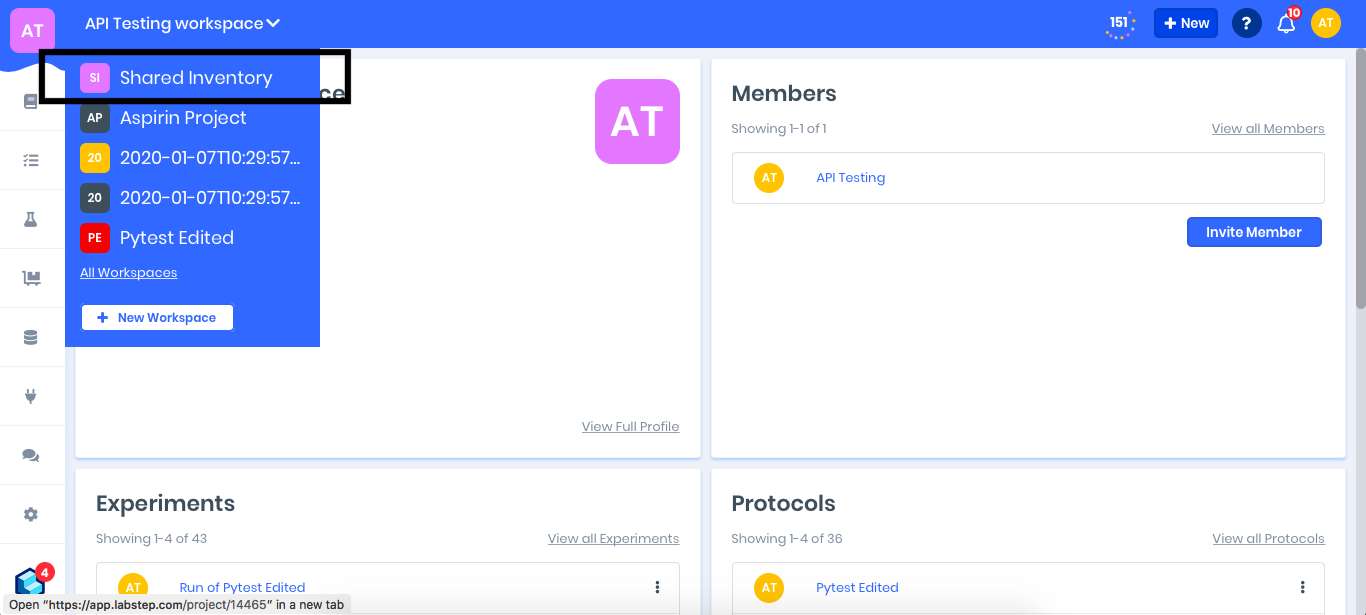

### Read input data

In [ ]:
data = pandas.read_csv('./resource_import.csv')
print(data)

For each data entry:

In [ ]:
for counter, name in enumerate(data['Name']):

    # Create a new Resource for it
    new_resource = user.newResource(name)

    # Add a new Item and use the 'ID' as the Item name
    new_item = new_resource.newItem(name=data['ID'][counter])

    # Set the amount
    new_item.edit(quantity_amount=data['Amount / uL'][counter],
                  quantity_unit='uL')

    # Set the location
    location = my_workspace.getResourceLocations(
        search_query=data['Location'][counter])

    if len(location) == 0:
        location = user.newResourceLocation(data['Location'][counter])
    else:
        location = location[0]

    new_item.edit(location=location)

All resources are imported:
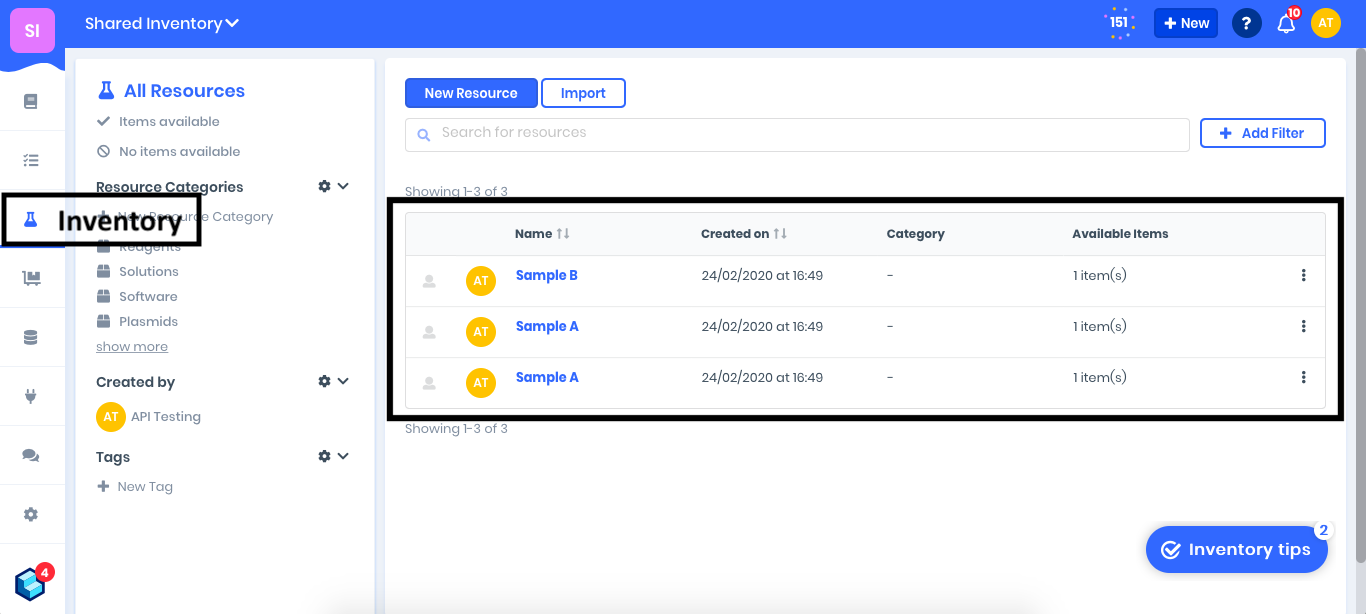

Information for each sample is added, like for Sample B:
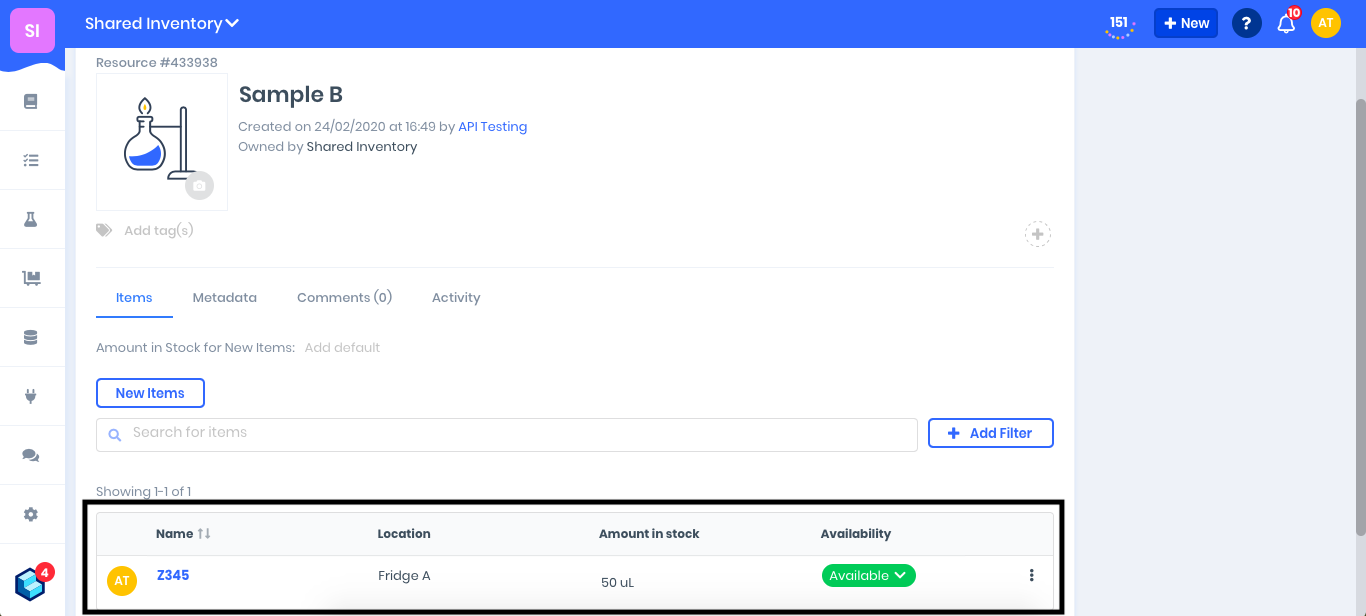

### View all resources in this workspace

In [ ]:
workspace.getResources()